In [1]:
import os
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import mapclassify as mc

import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import os
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn

In [2]:
boros = gpd.read_file("MCLP_data/inner_London.shp")

boros = boros.to_crs("epsg:27700")

inner_rd = gpd.read_file("MCLP_data/Inner_road.shp")

inner_rd = inner_rd.to_crs("epsg:27700")

In [3]:
current_buffer200 = gpd.read_file("MCLP_data/current_buffer200.shp")

current_buffer200 = current_buffer200.to_crs("epsg:27700")

pot_loc_new_dock = gpd.read_file("MCLP_data/potential_dock_jul31.shp")

pot_loc_new_dock = pot_loc_new_dock.to_crs("epsg:27700")

lsoa_cen_with_demand = gpd.read_file("MCLP_data/LOSA_cen_with_pop&bei.shp")

lsoa_cen_with_demand = lsoa_cen_with_demand.to_crs("epsg:27700")

In [622]:
pot_loc_new_dock_buffer200 = gpd.read_file("MCLP_data/potential_dock_aug5_buffer200.shp")

pot_loc_new_dock_buffer200 = pot_loc_new_dock_buffer200.to_crs("epsg:27700")

In [5]:
BEI_dem_cov = gpd.read_file("MCLP_data/BEI_dem_cov.shp")

BEI_dem_cov = BEI_dem_cov.to_crs("epsg:27700")

In [6]:
lsoa_cen_covered = gpd.read_file("MCLP_data/lsoa_cen_covered.shp")

lsoa_cen_covered = lsoa_cen_covered.to_crs("epsg:27700")

lsoa_cen_UNcovered = gpd.read_file("MCLP_data/lsoa_cen_UNcovered.shp")

lsoa_cen_UNcovered = lsoa_cen_UNcovered.to_crs("epsg:27700")

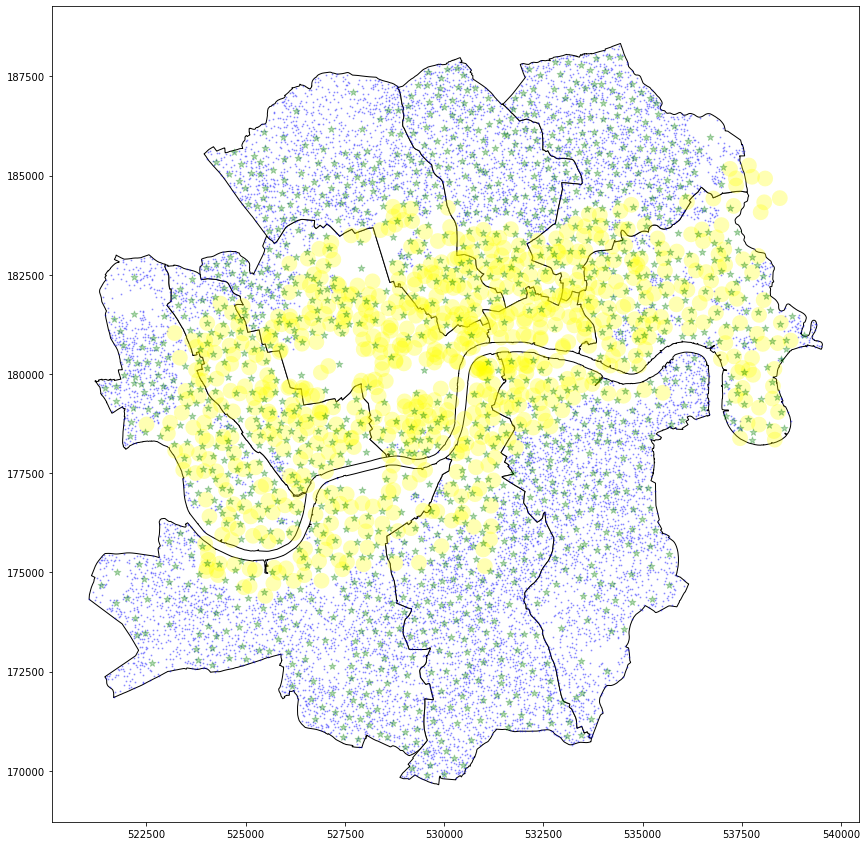

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
boros.plot(ax=ax, facecolor='w',edgecolor='black')

pot_loc_new_dock.plot(ax=ax, color='blue', alpha=0.3, markersize=1)
current_buffer200.plot(ax=ax, color='yellow', alpha=0.3)
lsoa_cen_with_demand.plot(ax=ax, color='green', alpha=0.3, markersize=50,marker="*");

In [8]:
lsoa_cen_with_demand.head(2)

,LSOA11CD,LSOA11NM,BEI_ind,overlap%,uncovered%,status,var1,var2,bi_var,Pop_lsoa,geometry
0,E01000001,City of London 001A,0.950788,98.976622,1.023378,Oversupplied,1,C,1C,1465.0,POINT (532150.879 181615.038)
1,E01000002,City of London 001B,0.000000,99.977214,0.022786,Oversupplied,1,C,1C,1436.0,POINT (532443.354 181645.862)


In [9]:
#current_coverage
print(f'{(lsoa_cen_covered["Pop_lsoa"].sum() / lsoa_cen_with_demand["Pop_lsoa"].sum()*100):0.2f}')

32.21


In [10]:
print(f'{(lsoa_cen_UNcovered["Pop_lsoa"].sum() / lsoa_cen_with_demand["Pop_lsoa"].sum()*100):0.2f}')

67.79


<AxesSubplot:>

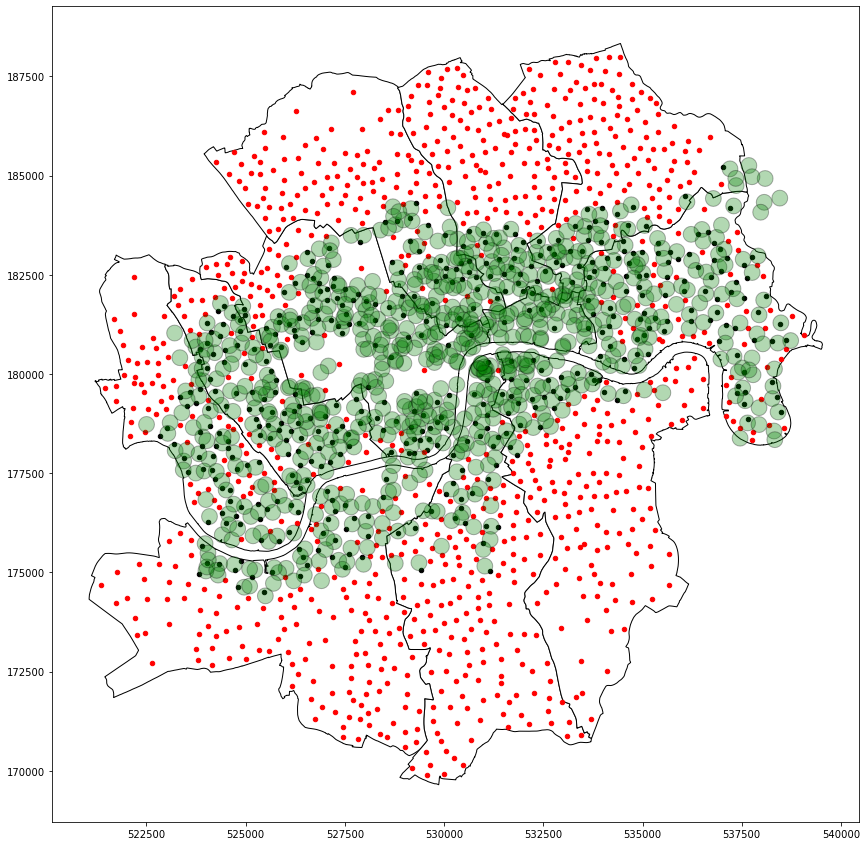

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
boros.plot(ax=ax, facecolor='w',edgecolor='black')

#covered
lsoa_cen_covered.plot(ax=ax, color='black', markersize=20)

#all uncovered point
lsoa_cen_UNcovered.plot(ax=ax, color='red', markersize=20)


#potential new service area (based on d1)
#kc_s2_uncover.plot(ax=ax, color='lightgrey', alpha=0.1, edgecolor='black')

#all possible service area (including those that are already covered)
#kc_s2.plot(ax=ax, color='green', alpha=0.1)  

#all current 没有红点在绿圈里面
current_buffer200.plot(ax=ax, color='green', alpha=0.3,edgecolor='black')

In [12]:
lsoa_cen_UNcovered

,LSOA11CD,LSOA11NM,BEI_ind,overlap%,uncovered%,status,var1,var2,bi_var,Pop_lsoa,field_1,id,name,lat,long,nbBikes,nbEmptyDoc,nbDocks,Count,geometry
0,E01003995,Southwark 014B,4.618706,38.482761,61.517239,Slight undersupplied,2,B,2B,1384.0,None,None,None,None,None,None,None,None,None,POINT (531882.979 178424.867)
1,E01003997,Southwark 017E,1.167221,0.000000,100.000000,Balanced,1,A,1A,1219.0,None,None,None,None,None,None,None,None,None,POINT (532171.057 177975.732)
2,E01003993,Southwark 017D,4.482256,0.000000,100.000000,Slight undersupplied,2,A,2A,1713.0,None,None,None,None,None,None,None,None,None,POINT (531746.062 177513.232)
3,E01003994,Southwark 012E,0.000000,20.318271,79.681729,Balanced,1,A,1A,1493.0,None,None,None,None,None,None,None,None,None,POINT (532097.839 178209.834)
4,E01003991,Southwark 017C,2.873075,0.000000,100.000000,Balanced,1,A,1A,1208.0,None,None,None,None,None,None,None,None,None,POINT (532121.953 177762.697)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,E01000857,Camden 018A,2.396008,0.000000,100.000000,Balanced,1,A,1A,1447.0,None,None,None,None,None,None,None,None,None,POINT (527747.455 184144.946)
949,E01000858,Camden 018B,0.000000,27.261323,72.738677,Slight oversupplied,1,B,1B,1861.0,None,None,None,None,None,None,None,None,None,POINT (528472.792 184232.207)
950,E01000855,Camden 028A,0.000000,87.400053,12.599947,Oversupplied,1,C,1C,1764.0,None,None,None,None,None,None,None,None,None,POINT (530011.890 181858.784)
951,E01000856,Camden 019A,0.587161,63.398993,36.601007,Slight oversupplied,1,B,1B,1645.0,None,None,None,None,None,None,None,None,None,POINT (528958.102 184270.714)


In [13]:
to_drop = ['field_1', 'id', 'name', 'lat', 'long', 'nbBikes','nbEmptyDoc','nbDocks','Count']
lsoa_cen_UNcovered_final = lsoa_cen_UNcovered.drop(columns=to_drop)
lsoa_cen_UNcovered_final.head(2)

,LSOA11CD,LSOA11NM,BEI_ind,overlap%,uncovered%,status,var1,var2,bi_var,Pop_lsoa,geometry
0,E01003995,Southwark 014B,4.618706,38.482761,61.517239,Slight undersupplied,2,B,2B,1384.0,POINT (531882.979 178424.867)
1,E01003997,Southwark 017E,1.167221,0.000000,100.000000,Balanced,1,A,1A,1219.0,POINT (532171.057 177975.732)


In [14]:
len(lsoa_cen_UNcovered_final)

953

In [544]:
lsoa_cen_UNcovered_final['demand_coe'] = 0

In [545]:
#give undersupply lsoa a coefficient of 10, slightly undersupply a 5, balanced a 1, all oversupply a 0.1
#to integrate equity into population

for row in range(0,953):
    if lsoa_cen_UNcovered_final['bi_var'][row] == '3A':
        lsoa_cen_UNcovered_final['demand_coe'][row] = 3 * lsoa_cen_UNcovered_final['Pop_lsoa'][row]
    elif lsoa_cen_UNcovered_final['bi_var'][row] == '2A' or lsoa_cen_UNcovered_final['bi_var'][row] == '3B':
        lsoa_cen_UNcovered_final['demand_coe'][row] = 2 * lsoa_cen_UNcovered_final['Pop_lsoa'][row]
    elif lsoa_cen_UNcovered_final['bi_var'][row] == '1A' or lsoa_cen_UNcovered_final['bi_var'][row] == '2B' or lsoa_cen_UNcovered_final['bi_var'][row] == '3C':
        lsoa_cen_UNcovered_final['demand_coe'][row] = 0.1 * lsoa_cen_UNcovered_final['Pop_lsoa'][row]
    else:
        lsoa_cen_UNcovered_final['demand_coe'][row] = 0 * lsoa_cen_UNcovered_final['Pop_lsoa'][row]

In [18]:
lsoa_cen_UNcovered_final.loc[lsoa_cen_UNcovered_final['LSOA11CD'] == 'E01003074']

,LSOA11CD,LSOA11NM,BEI_ind,overlap%,uncovered%,status,var1,var2,bi_var,Pop_lsoa,geometry,demand_coe
822,E01003074,Lambeth 018E,0.0,0.0,100.0,Balanced,1,A,1A,2364.0,POINT (531637.258 174193.687),236.4


In [19]:
lsoa_cen_UNcovered_final.loc[lsoa_cen_UNcovered_final['LSOA11CD'] == 'E01003179']

,LSOA11CD,LSOA11NM,BEI_ind,overlap%,uncovered%,status,var1,var2,bi_var,Pop_lsoa,geometry,demand_coe
865,E01003179,Lambeth 024E,6.288388,0.0,100.0,Undersupplied,3,A,3A,1653.0,POINT (531139.997 174172.443),4959.0


## average BEI overall

In [332]:
lsoa_cen_with_demand['BEI_ind'].sum() / len(lsoa_cen_with_demand)

1.8146894583385256

## Allagash

In [ ]:
conda install -c conda-forge allagash geopandas


In [ ]:
conda update -n base -c defaults conda

In [21]:
import warnings
warnings.filterwarnings('ignore')
import geopandas
import matplotlib.pyplot as plt
import pulp
from allagash import Coverage, Problem
%matplotlib inline

接下来我需要去用 1A 1B 1C 乘以 pop 去算demand！！！！然后再mclp

In [623]:
pot_loc_new_dock_buffer200

,LSOA11CD,LSOA11NM,BEI_ind,pot_id,geometry
0,E01033603,Westminster 009I,8.260204,0,"POLYGON ((527578.903 181948.132, 527566.668 18..."
1,E01033603,Westminster 009I,8.260204,1,"POLYGON ((527484.585 182002.495, 527472.349 18..."
2,E01033603,Westminster 009I,8.260204,2,"POLYGON ((527536.238 182020.061, 527524.002 18..."
3,E01033605,Westminster 009K,12.395661,3,"POLYGON ((527092.636 182296.441, 527080.400 18..."
4,E01033606,Westminster 014F,10.020210,4,"POLYGON ((525418.328 181433.917, 525406.092 18..."
...,...,...,...,...,...
9511,E01003150,Lambeth 032F,0.000000,9511,"POLYGON ((530674.375 171052.075, 530662.139 17..."
9512,E01003150,Lambeth 032F,0.000000,9512,"POLYGON ((530585.210 171194.172, 530572.974 17..."
9513,E01003150,Lambeth 032F,0.000000,9513,"POLYGON ((530381.622 171208.815, 530369.386 17..."
9514,E01003150,Lambeth 032F,0.000000,9514,"POLYGON ((530299.003 171329.345, 530286.767 17..."


In [628]:
new_coverage = Coverage.from_geodataframes(lsoa_cen_UNcovered_final, 
                                           pot_loc_new_dock_buffer200, 
                                           "LSOA11CD", "LSOA11CD", 
                                           demand_col="demand_coe", demand_name="demand")


new_coverage = Coverage.from_geodataframes(kc_d1, 
                                           kc_s2_uncover, 
                                           "NAPTANID", "NAPTANID", 
                                           demand_col="All Ages", demand_name="demand")


In [629]:
new_problem = Problem.mclp(new_coverage, max_supply={new_coverage: 80})

In [630]:
new_problem.solve(pulp.GLPK());

<AxesSubplot:>

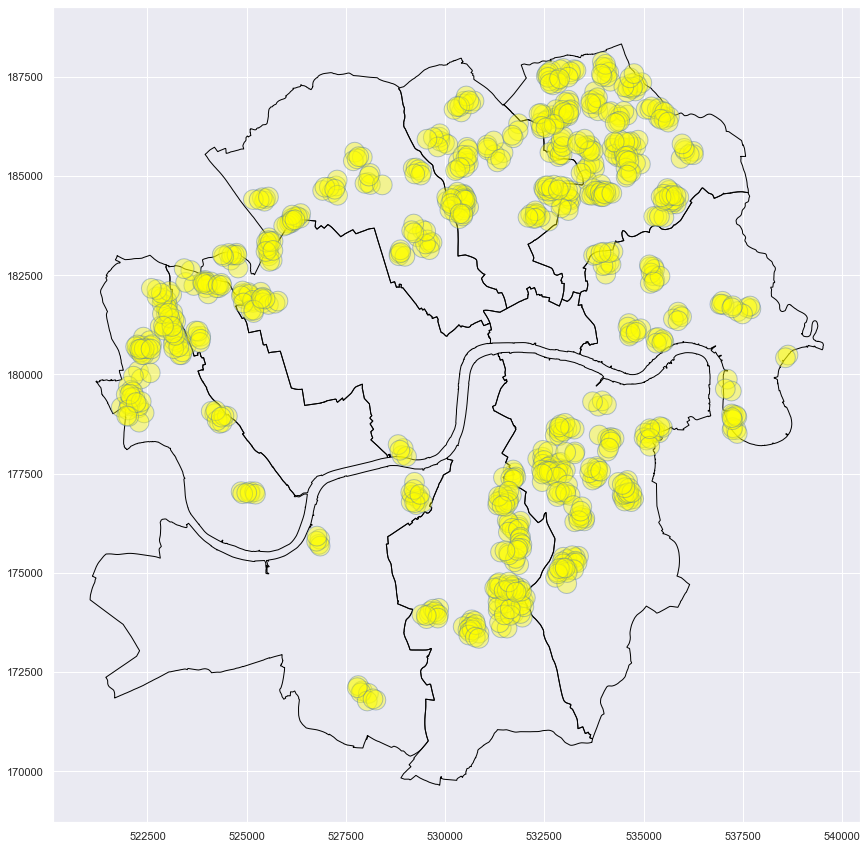

In [631]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
selected_locations = pot_loc_new_dock_buffer200.query(f"LSOA11CD in ({[f'{i}' for i in new_problem.selected_supply(new_coverage)]})")
boros.plot(ax=ax, facecolor='none',edgecolor='black')
selected_locations.plot(ax=ax, color='yellow', alpha=0.4, edgecolor='b') 


Find the best dock from all proposed ones

In [632]:
lsoa_cen_with_demand['demand_coe']= 0

In [633]:
for row in range(0,1415):
    if lsoa_cen_with_demand['bi_var'][row] == '3A':
        lsoa_cen_with_demand['demand_coe'][row] = 3 * lsoa_cen_with_demand['Pop_lsoa'][row]
    elif lsoa_cen_with_demand['bi_var'][row] == '2A' or lsoa_cen_with_demand['bi_var'][row] == '3B':
        lsoa_cen_with_demand['demand_coe'][row] = 2 * lsoa_cen_with_demand['Pop_lsoa'][row]
    elif lsoa_cen_with_demand['bi_var'][row] == '1A' or lsoa_cen_with_demand['bi_var'][row] == '2B' or lsoa_cen_with_demand['bi_var'][row] == '3C':
        lsoa_cen_with_demand['demand_coe'][row] = 0.1 * lsoa_cen_with_demand['Pop_lsoa'][row]
    else:
        lsoa_cen_with_demand['demand_coe'][row] = 0 * lsoa_cen_with_demand['Pop_lsoa'][row]

In [634]:
selected_locations['area_id'] = selected_locations.index

In [635]:
selected_locations.loc[selected_locations['LSOA11CD'] == 'E01033699']

,LSOA11CD,LSOA11NM,BEI_ind,pot_id,geometry,area_id
57,E01033699,Hackney 021G,0.29157,57,"POLYGON ((534016.015 185191.315, 534003.779 18...",57
58,E01033699,Hackney 021G,0.29157,58,"POLYGON ((533896.084 185303.181, 533883.848 18...",58
59,E01033699,Hackney 021G,0.29157,59,"POLYGON ((533751.478 185133.197, 533739.242 18...",59
60,E01033699,Hackney 021G,0.29157,60,"POLYGON ((533805.989 185187.934, 533793.753 18...",60
62,E01033699,Hackney 021G,0.29157,62,"POLYGON ((533813.025 184908.720, 533800.789 18...",62
71,E01033699,Hackney 021G,0.29157,71,"POLYGON ((534002.116 185316.796, 533989.880 18...",71
72,E01033699,Hackney 021G,0.29157,72,"POLYGON ((533675.437 185073.571, 533663.202 18...",72


In [636]:
new_dock = gpd.sjoin(selected_locations, lsoa_cen_UNcovered_final, how="left", op="contains")

In [637]:
new_dock.loc[new_dock['LSOA11CD_left'] == 'E01033699']

,LSOA11CD_left,LSOA11NM_left,BEI_ind_left,pot_id,geometry,area_id,index_right,LSOA11CD_right,LSOA11NM_right,BEI_ind_right,overlap%,uncovered%,status,var1,var2,bi_var,Pop_lsoa,demand_coe
57,E01033699,Hackney 021G,0.29157,57,"POLYGON ((534016.015 185191.315, 534003.779 18...",57,489.0,E01001748,Hackney 020A,0.211138,0.0,100.0,Balanced,1,A,1A,2306.0,230.6
57,E01033699,Hackney 021G,0.29157,57,"POLYGON ((534016.015 185191.315, 534003.779 18...",57,390.0,E01033699,Hackney 021G,0.291570,0.0,100.0,Balanced,1,A,1A,1217.0,121.7
57,E01033699,Hackney 021G,0.29157,57,"POLYGON ((534016.015 185191.315, 534003.779 18...",57,488.0,E01001747,Hackney 014B,0.309025,0.0,100.0,Balanced,1,A,1A,2137.0,213.7
58,E01033699,Hackney 021G,0.29157,58,"POLYGON ((533896.084 185303.181, 533883.848 18...",58,390.0,E01033699,Hackney 021G,0.291570,0.0,100.0,Balanced,1,A,1A,1217.0,121.7
58,E01033699,Hackney 021G,0.29157,58,"POLYGON ((533896.084 185303.181, 533883.848 18...",58,488.0,E01001747,Hackney 014B,0.309025,0.0,100.0,Balanced,1,A,1A,2137.0,213.7
59,E01033699,Hackney 021G,0.29157,59,"POLYGON ((533751.478 185133.197, 533739.242 18...",59,390.0,E01033699,Hackney 021G,0.291570,0.0,100.0,Balanced,1,A,1A,1217.0,121.7
59,E01033699,Hackney 021G,0.29157,59,"POLYGON ((533751.478 185133.197, 533739.242 18...",59,488.0,E01001747,Hackney 014B,0.309025,0.0,100.0,Balanced,1,A,1A,2137.0,213.7
60,E01033699,Hackney 021G,0.29157,60,"POLYGON ((533805.989 185187.934, 533793.753 18...",60,390.0,E01033699,Hackney 021G,0.291570,0.0,100.0,Balanced,1,A,1A,1217.0,121.7
60,E01033699,Hackney 021G,0.29157,60,"POLYGON ((533805.989 185187.934, 533793.753 18...",60,488.0,E01001747,Hackney 014B,0.309025,0.0,100.0,Balanced,1,A,1A,2137.0,213.7
62,E01033699,Hackney 021G,0.29157,62,"POLYGON ((533813.025 184908.720, 533800.789 18...",62,391.0,E01033700,Hackney 021H,0.432100,0.0,100.0,Balanced,1,A,1A,1566.0,156.6


In [642]:
sum_now = new_dock.groupby(["area_id"]).sum()

In [643]:
to_drop = ['BEI_ind_left', 'index_right','pot_id', 'overlap%', 'uncovered%',
           'BEI_ind_right']

sum_now = sum_now.drop(columns=to_drop)
sum_now.head(2)

,Pop_lsoa,demand_coe
area_id,,
57,5660.0,566.0
58,3354.0,335.4


In [644]:
selected_locations_final = pd.merge(selected_locations, sum_now, how = 'left', left_on = 'area_id', right_on = 'area_id')

In [645]:
selected_locations_final.loc[selected_locations_final['LSOA11CD'] == 'E01033699']

,LSOA11CD,LSOA11NM,BEI_ind,pot_id,geometry,area_id,Pop_lsoa,demand_coe
0,E01033699,Hackney 021G,0.29157,57,"POLYGON ((534016.015 185191.315, 534003.779 18...",57,5660.0,566.0
1,E01033699,Hackney 021G,0.29157,58,"POLYGON ((533896.084 185303.181, 533883.848 18...",58,3354.0,335.4
2,E01033699,Hackney 021G,0.29157,59,"POLYGON ((533751.478 185133.197, 533739.242 18...",59,3354.0,335.4
3,E01033699,Hackney 021G,0.29157,60,"POLYGON ((533805.989 185187.934, 533793.753 18...",60,3354.0,335.4
4,E01033699,Hackney 021G,0.29157,62,"POLYGON ((533813.025 184908.720, 533800.789 18...",62,2783.0,278.3
5,E01033699,Hackney 021G,0.29157,71,"POLYGON ((534002.116 185316.796, 533989.880 18...",71,2137.0,213.7
6,E01033699,Hackney 021G,0.29157,72,"POLYGON ((533675.437 185073.571, 533663.202 18...",72,3004.0,3695.7


In [646]:
final_new_dock = selected_locations_final.sort_values(['LSOA11CD', 'demand_coe'], ascending=[True, False]).drop_duplicates(['LSOA11CD']).reset_index(drop=True)
    
final_new_dock

,LSOA11CD,LSOA11NM,BEI_ind,pot_id,geometry,area_id,Pop_lsoa,demand_coe
0,E01000842,Camden 011A,0.858986,4781,"POLYGON ((527538.738 184513.804, 527526.502 18...",4781,4409.0,3292.8
1,E01000888,Camden 006C,1.096077,4280,"POLYGON ((528163.702 185476.201, 528151.466 18...",4280,4690.0,5225.0
2,E01000900,Camden 012A,2.013681,4478,"POLYGON ((528367.114 184786.040, 528354.878 18...",4478,5296.0,9214.1
3,E01000925,Camden 009D,4.444297,5580,"POLYGON ((529635.654 185023.385, 529623.418 18...",5580,5047.0,3474.4
4,E01000934,Camden 020D,4.445475,5605,"POLYGON ((526261.643 183772.081, 526249.407 18...",5605,4709.0,6235.5
...,...,...,...,...,...,...,...,...
74,E01032805,Southwark 022F,1.616625,4177,"POLYGON ((534716.140 177227.157, 534703.904 17...",4177,6714.0,8581.1
75,E01033492,Islington 011I,0.000000,4203,"POLYGON ((531325.339 185654.631, 531313.103 18...",4203,4824.0,5690.8
76,E01033699,Hackney 021G,0.291570,72,"POLYGON ((533675.437 185073.571, 533663.202 18...",72,3004.0,3695.7
77,E01033705,Hackney 028D,0.000000,94,"POLYGON ((535661.421 186726.929, 535649.185 18...",94,2576.0,3618.7


In [647]:
len(final_new_dock)

79

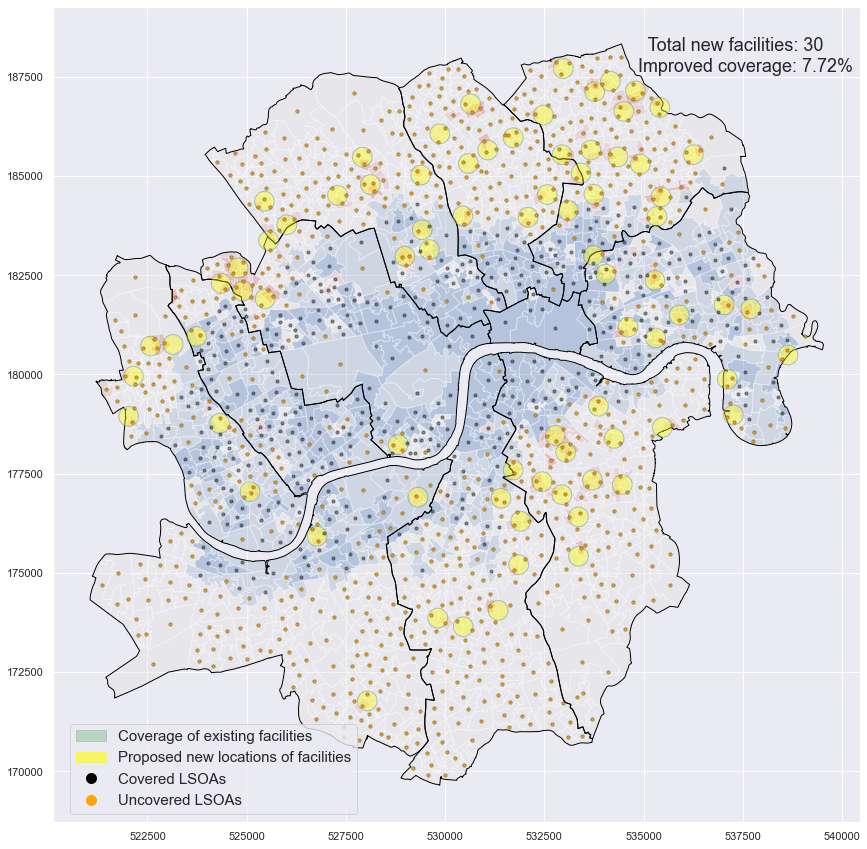

In [648]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

#selected_locations = pot_loc_new_dock_buffer200.query(f"LSOA11CD in ({[f'{i}' for i in new_problem.selected_supply(new_coverage)]})")
#drop duplicas
#unique = selected_locations.drop_duplicates(subset = ["LSOA11CD"])
#--------------------------------------------------------------------------
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')


#--------------------------------------------------------------------------
biv_Palette2 = {'1A': '#e2e2e2', '1B': '#a4b7ce', '1C': '#678bbb',
               '2A': '#dcb1b1', '2B': '#e2e2e2', '2C': '#a4b7ce',
               '3A': '#d67c7c', '3B': '#dcb1b1', '3C': '#e2e2e2'}
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in BEI_dem_cov.groupby('bi_var'):
    
    # Define the color for each group using the dictionary
    color = biv_Palette2[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype,
              alpha=0.4)
    
boros.plot(ax=ax, facecolor='none',edgecolor='black')

#--------------------------------------------------------------------------


#所有可能建造新设施的地方
#kc_s2.plot(ax=ax, color='grey', alpha=0.3)    

#borough road
#inner_rd.plot(ax=ax, color='lightgrey',alpha=0.5,zorder=1)

#现存设施
#current_buffer200.plot(ax=ax, color='green', alpha=0.05, edgecolor='b').set_title("Potential Locations for New Facilities - Westminster", size=24)  

#算出来的xx个新设施
final_new_dock.plot(ax=ax, color='yellow', alpha=0.4, edgecolor='b') 

#所有centroid
lsoa_cen_with_demand.plot(ax=ax, color='black', markersize = 10,alpha=0.4,
          label='Covered LSOAs')  

#没被cover的centroid
lsoa_cen_UNcovered.plot(ax=ax, color='orange', markersize = 10, alpha=0.6, marker='*',
           label='Uncovered LSOAs')  


#--------------------------------------------------------------------------



green_patch = mpatches.Patch(color='green',alpha=0.2, label='Coverage of existing facilities')
ye_patch = mpatches.Patch(color='yellow',alpha=0.6, label='Proposed new locations of facilities')
black_dot = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Covered LSOAs')
red_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=10, label='Uncovered LSOAs')


plt.legend(handles=[green_patch,ye_patch,black_dot,red_dot],loc=[0.02,0.01], prop={'size': 15})

#leg = ax.legend(loc=[0.08,0.155], prop={'size': 15});
#--------------------------------------------------------------------------


plt.figtext(x=0.68, y=0.82, s=f"  Total new facilities: 30 \nImproved coverage: 7.72%", size=18);

In [649]:
lsoa_cen_new_cover = gpd.sjoin(lsoa_cen_UNcovered, final_new_dock, how="right", op="intersects")

lsoa_cen_new_cover


,index_left,LSOA11CD_left,LSOA11NM_left,BEI_ind_left,overlap%,uncovered%,status,var1,var2,bi_var,...,nbDocks,Count,LSOA11CD_right,LSOA11NM_right,BEI_ind_right,pot_id,geometry,area_id,Pop_lsoa_right,demand_coe
0,940,E01000845,Camden 014B,0.249696,0.0,100.0,Balanced,1,A,1A,...,None,None,E01000842,Camden 011A,0.858986,4781,"POLYGON ((527538.738 184513.804, 527526.502 18...",4781,4409.0,3292.8
0,941,E01000846,Camden 014C,3.724255,0.0,100.0,Slight undersupplied,2,A,2A,...,None,None,E01000842,Camden 011A,0.858986,4781,"POLYGON ((527538.738 184513.804, 527526.502 18...",4781,4409.0,3292.8
0,952,E01000842,Camden 011A,0.858986,0.0,100.0,Balanced,1,A,1A,...,None,None,E01000842,Camden 011A,0.858986,4781,"POLYGON ((527538.738 184513.804, 527526.502 18...",4781,4409.0,3292.8
1,905,E01000890,Camden 007B,7.306272,0.0,100.0,Undersupplied,3,A,3A,...,None,None,E01000888,Camden 006C,1.096077,4280,"POLYGON ((528163.702 185476.201, 528151.466 18...",4280,4690.0,5225.0
1,907,E01000888,Camden 006C,1.096077,0.0,100.0,Balanced,1,A,1A,...,None,None,E01000888,Camden 006C,1.096077,4280,"POLYGON ((528163.702 185476.201, 528151.466 18...",4280,4690.0,5225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,665,E01002778,Islington 012B,3.731453,0.0,100.0,Slight undersupplied,2,A,2A,...,None,None,E01033699,Hackney 021G,0.291570,72,"POLYGON ((533675.437 185073.571, 533663.202 18...",72,3004.0,3695.7
77,384,E01033710,Hackney 028E,7.695942,0.0,100.0,Undersupplied,3,A,3A,...,None,None,E01033705,Hackney 028D,0.000000,94,"POLYGON ((535661.421 186726.929, 535649.185 18...",94,2576.0,3618.7
77,387,E01033705,Hackney 028D,0.000000,0.0,100.0,Balanced,1,A,1A,...,None,None,E01033705,Hackney 028D,0.000000,94,"POLYGON ((535661.421 186726.929, 535649.185 18...",94,2576.0,3618.7
78,479,E01001759,Hackney 016E,1.916002,0.0,100.0,Balanced,1,A,1A,...,None,None,E01033713,Hackney 010G,0.000000,108,"POLYGON ((534604.708 185481.469, 534592.472 18...",108,3460.0,5148.4


In [652]:
len(lsoa_cen_new_cover)

181

In [654]:
lsoa_2A_new = lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '2A']
len(lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '2A'])

51

In [655]:
lsoa_3A_new = lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '3A']
len(lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '3A'])

39

In [656]:
lsoa_3B_new = lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '3B']
len(lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '3B'])

12

In [657]:
lsoa_unsup_new_cover = len(lsoa_3B_new) + len(lsoa_3A_new) + len(lsoa_2A_new)

In [658]:
lsoa_unsup_new_cover

102

In [659]:
# percentage of new lsoas being covered

print(f'{(lsoa_unsup_new_cover / lsoa_unsup_num  * 100):0.2f}%')

81.60%


In [660]:
frames = [lsoa_2A_new,lsoa_3A_new, lsoa_3B_new]

In [661]:
new_cover = pd.concat(frames)

In [662]:
new_cover["Pop_lsoa_left"].sum()

172102.0

In [663]:
unsup_uncover["Pop_lsoa"].sum()

214032.0

In [664]:
#percentage of new population being covered
print(f'{(new_cover["Pop_lsoa_left"].sum() / unsup_uncover["Pop_lsoa"].sum()*100):0.2f}%')

80.41%


In [665]:
lsoa_unsup_new_cover

102

In [666]:

lsoa_unsup_new_cover / lsoa_unsup_num  * 100

81.6

# For loop for 1 to 100 new docks

In [667]:
lsoa_unsup_num = len(lsoa_cen_UNcovered.loc[lsoa_cen_UNcovered['bi_var'] == '2A']) + len(lsoa_cen_UNcovered.loc[lsoa_cen_UNcovered['bi_var'] == '3A']) + len(lsoa_cen_UNcovered.loc[lsoa_cen_UNcovered['bi_var'] == '3B'])

In [668]:
lsoa_unsup_num

125

In [669]:
lsoa_2A_unsup = lsoa_cen_UNcovered.loc[lsoa_cen_UNcovered['bi_var'] == '2A']
lsoa_3A_unsup = lsoa_cen_UNcovered.loc[lsoa_cen_UNcovered['bi_var'] == '3A']
lsoa_3B_unsup = lsoa_cen_UNcovered.loc[lsoa_cen_UNcovered['bi_var'] == '3B']

In [670]:
frames_unsup = [lsoa_2A_unsup,lsoa_3A_unsup, lsoa_3B_unsup]
unsup_uncover = pd.concat(frames_unsup)

In [671]:
unsup_uncover["Pop_lsoa"].sum()

214032.0

In [672]:
covered_new = pd.DataFrame(columns=['new_pop_num','new_pop_per','new_lsoa_num', 'new_lsoa_per','2A_num','3A_num','3B_num'],index=range(1,120))

In [673]:
import timeit
  

In [674]:
#千万不要碰这一部分的代码！
start = timeit.default_timer()

count = 1

while count <= 120:
    print(f'now {count} new docks')
    new_problem = Problem.mclp(new_coverage, max_supply={new_coverage: count})
    new_problem.solve(pulp.GLPK())
    selected_locations = pot_loc_new_dock_buffer200.query(f"LSOA11CD in ({[f'{i}' for i in new_problem.selected_supply(new_coverage)]})")
    selected_locations['area_id'] = selected_locations.index
    new_dock = gpd.sjoin(selected_locations, lsoa_cen_UNcovered_final, how="left", op="contains")
    sum_now = new_dock.groupby(["area_id"]).sum()
    to_drop = ['BEI_ind_left', 'index_right','pot_id', 'overlap%', 'uncovered%',
           'BEI_ind_right']
    sum_now = sum_now.drop(columns=to_drop)
    selected_locations_final = pd.merge(selected_locations, sum_now, how = 'left', left_on = 'area_id', right_on = 'area_id')    
    final_new_dock = selected_locations_final.sort_values(['LSOA11CD', 'demand_coe'], ascending=[True, False]).drop_duplicates(['LSOA11CD']).reset_index(drop=True)

    #calculating new coverage
    lsoa_cen_new_cover = gpd.sjoin(lsoa_cen_UNcovered, final_new_dock, how="right", op="intersects")

    
    lsoa_2A_new = lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '2A']
    lsoa_3A_new = lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '3A']
    lsoa_3B_new = lsoa_cen_new_cover.loc[lsoa_cen_new_cover['bi_var'] == '3B']
    lsoa_unsup_new_cover = len(lsoa_3B_new) + len(lsoa_3A_new) + len(lsoa_2A_new)
    print(f'Percentage of undersupplied lsoas being newly covered: {(lsoa_unsup_new_cover / lsoa_unsup_num  * 100):0.2f}%')
    
    frames = [lsoa_2A_new,lsoa_3A_new, lsoa_3B_new]
    new_cover = pd.concat(frames)
    print(f'Percentage of new population being covered: {(new_cover["Pop_lsoa_left"].sum() / unsup_uncover["Pop_lsoa"].sum()*100):0.2f}%')
    
    covered_new["new_pop_num"][count] = new_cover["Pop_lsoa_left"].sum()
    covered_new["new_pop_per"][count] = new_cover["Pop_lsoa_left"].sum() / unsup_uncover["Pop_lsoa"].sum()*100
    covered_new["new_lsoa_num"][count] = lsoa_unsup_new_cover
    covered_new["new_lsoa_per"][count] = lsoa_unsup_new_cover / lsoa_unsup_num  * 100
    covered_new['2A_num'][count] = len(lsoa_2A_new)
    covered_new['3A_num'][count] = len(lsoa_3A_new)
    covered_new['3B_num'][count] = len(lsoa_3B_new)
    count = count+1
    
    


#Your statements here

stop = timeit.default_timer()

print('Time: ', stop - start)

now 1 new docks
Percentage of undersupplied lsoas being newly covered: 2.40%
Percentage of new population being covered: 3.02%
now 2 new docks
Percentage of undersupplied lsoas being newly covered: 4.00%
Percentage of new population being covered: 4.68%
now 3 new docks
Percentage of undersupplied lsoas being newly covered: 6.40%
Percentage of new population being covered: 7.03%
now 4 new docks
Percentage of undersupplied lsoas being newly covered: 8.00%
Percentage of new population being covered: 8.80%
now 5 new docks
Percentage of undersupplied lsoas being newly covered: 9.60%
Percentage of new population being covered: 10.41%
now 6 new docks
Percentage of undersupplied lsoas being newly covered: 11.20%
Percentage of new population being covered: 12.05%
now 7 new docks
Percentage of undersupplied lsoas being newly covered: 12.00%
Percentage of new population being covered: 12.96%
now 8 new docks
Percentage of undersupplied lsoas being newly covered: 14.40%
Percentage of new population

Percentage of undersupplied lsoas being newly covered: 74.40%
Percentage of new population being covered: 75.33%
now 66 new docks
Percentage of undersupplied lsoas being newly covered: 75.20%
Percentage of new population being covered: 76.04%
now 67 new docks
Percentage of undersupplied lsoas being newly covered: 75.20%
Percentage of new population being covered: 75.56%
now 68 new docks
Percentage of undersupplied lsoas being newly covered: 76.00%
Percentage of new population being covered: 76.22%
now 69 new docks
Percentage of undersupplied lsoas being newly covered: 76.80%
Percentage of new population being covered: 76.94%
now 70 new docks
Percentage of undersupplied lsoas being newly covered: 77.60%
Percentage of new population being covered: 77.52%
now 71 new docks
Percentage of undersupplied lsoas being newly covered: 78.40%
Percentage of new population being covered: 78.05%
now 72 new docks
Percentage of undersupplied lsoas being newly covered: 79.20%
Percentage of new population

KeyboardInterrupt: 

In [691]:
covered_new_final = covered_new

In [692]:
covered_new_final.tail(50)

,new_pop_num,new_pop_per,new_lsoa_num,new_lsoa_per,2A_num,3A_num,3B_num
70,165908.0,77.515512,97,77.6,48,39,10
71,167047.0,78.047675,98,78.4,49,39,10
72,168506.0,78.729349,99,79.2,49,39,11
73,169847.0,79.355891,100,80.0,50,39,11
74,171196.0,79.98617,101,80.8,50,39,12
75,172304.0,80.50385,102,81.6,51,39,12
76,172089.0,80.403398,102,81.6,51,39,12
77,172089.0,80.403398,102,81.6,51,39,12
78,172089.0,80.403398,102,81.6,51,39,12
79,172102.0,80.409471,102,81.6,51,39,12


In [475]:
unsup_uncover["Pop_lsoa"].sum()

214032.0

In [480]:
len(new_cover)

52

In [457]:
orig_cover = (lsoa_cen_covered["Pop_lsoa"].sum() / lsoa_cen_with_demand["Pop_lsoa"].sum()*100)
orig_cover

32.20798245467178

[Text(0.5, 0, 'Number of new facilities'), Text(0, 0.5, 'Overall coverage')]

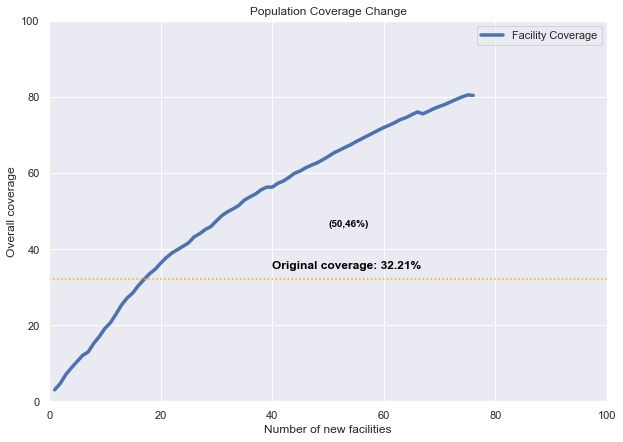

In [682]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.set(style="darkgrid")


sns.lineplot(ax=ax,data=covered_new_final["new_pop_per"],linewidth=3.5,legend=True ).set_title(
    "Population Coverage Change")

ax.set_ylim(0,100)
ax.set_xlim(0,100)
ax.legend(["Facility Coverage"])


plt.axhline(orig_cover, color='orange',linestyle=':')
plt.text(40, 35, "Original coverage: 32.21%", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(50, 46, f"(50,46%)", horizontalalignment='left', size='small', color='black', weight='semibold')

plt.scatter(157, 100, marker='*', color='black', s=100)
ax.set(xlabel='Number of new facilities', ylabel='Overall coverage')

In [317]:
orig_cover_pt = (len(lsoa_cen_covered) / len(lsoa_cen_with_demand)*100)
orig_cover_pt

32.650176678445234

[Text(0.5, 0, 'Number of new facilities'), Text(0, 0.5, 'Overall coverage')]

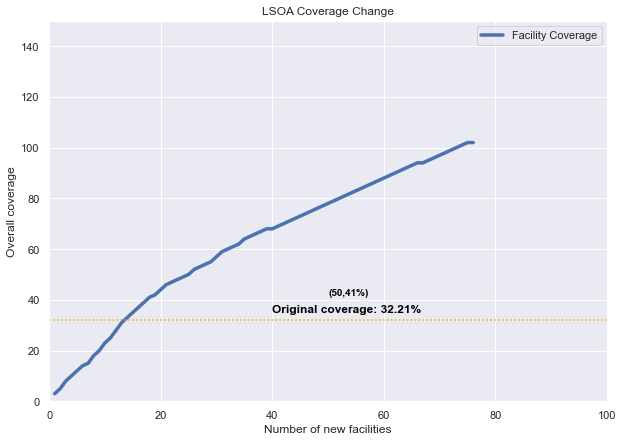

In [684]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.set(style="darkgrid")


sns.lineplot(ax=ax,data=covered_new_final["new_lsoa_num"],linewidth=3.5,legend=True ).set_title(
    "LSOA Coverage Change")

ax.set_ylim(0,150)
ax.set_xlim(0,100)
ax.legend(["Facility Coverage"])


plt.axhline(orig_cover, color='orange',linestyle=':')
plt.text(40, 35, "Original coverage: 32.21%", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(50, 41.5, f"(50,41%)", horizontalalignment='left', size='small', color='black', weight='semibold')

plt.scatter(157, 100, marker='*', color='black', s=100)
ax.set(xlabel='Number of new facilities', ylabel='Overall coverage')

# plot for 100 new docks

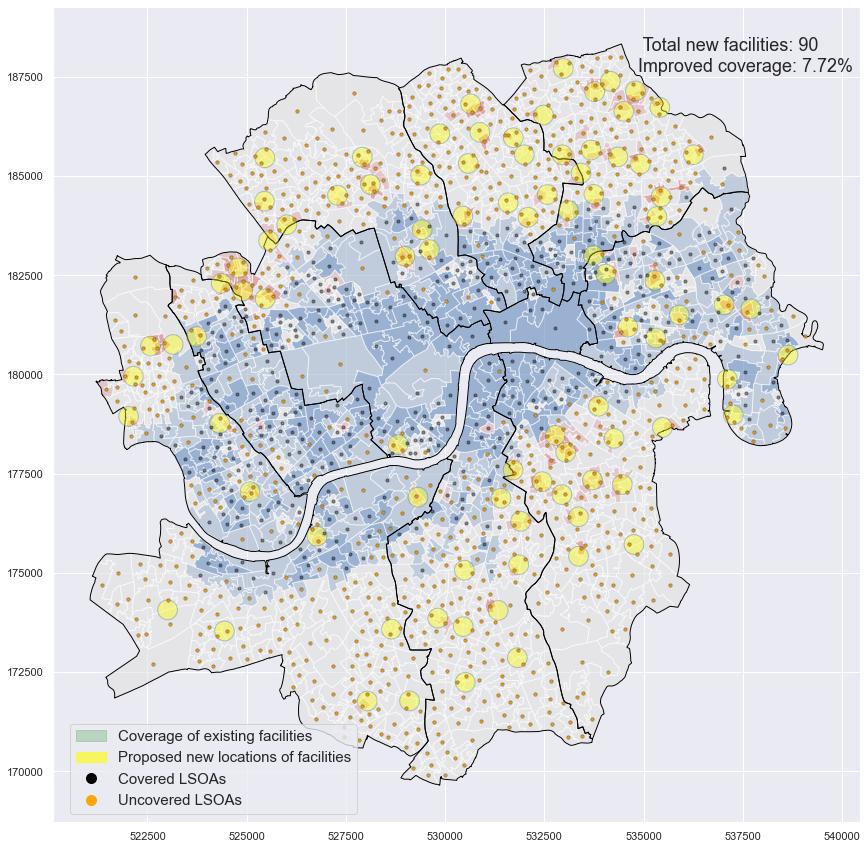

In [687]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

selected_locations = pot_loc_new_dock_buffer200.query(f"LSOA11CD in ({[f'{i}' for i in new_problem.selected_supply(new_coverage)]})")
#drop duplicas
unique = selected_locations.drop_duplicates(subset = ["LSOA11CD"])
#--------------------------------------------------------------------------
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')


#--------------------------------------------------------------------------
biv_Palette2 = {'1A': '#e2e2e2', '1B': '#a4b7ce', '1C': '#678bbb',
               '2A': '#dcb1b1', '2B': '#e2e2e2', '2C': '#a4b7ce',
               '3A': '#d67c7c', '3B': '#dcb1b1', '3C': '#e2e2e2'}
# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in BEI_dem_cov.groupby('bi_var'):
    
    # Define the color for each group using the dictionary
    color = biv_Palette2[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype,
              alpha=0.6)
    
boros.plot(ax=ax, facecolor='none',edgecolor='black')

#--------------------------------------------------------------------------


#所有可能建造新设施的地方
#pot_loc_new_dock.plot(ax=ax, color='grey', markersize = 10,alpha=0.3)    

#borough road
#inner_rd.plot(ax=ax, color='lightgrey',alpha=0.5,zorder=1)

#现存设施
#current_buffer200.plot(ax=ax, color='green', alpha=0.05, edgecolor='b').set_title("Potential Locations for New Facilities - Westminster", size=24)  

#算出来的xx个新设施
final_new_dock.plot(ax=ax, color='yellow', alpha=0.4, edgecolor='b') 

#所有centroid
lsoa_cen_with_demand.plot(ax=ax, color='black', markersize = 10,alpha=0.4,
          label='Covered LSOAs')  

#没被cover的centroid
lsoa_cen_UNcovered.plot(ax=ax, color='orange', markersize = 10, alpha=0.6, marker='*',
           label='Uncovered LSOAs')  


#--------------------------------------------------------------------------



green_patch = mpatches.Patch(color='green',alpha=0.2, label='Coverage of existing facilities')
ye_patch = mpatches.Patch(color='yellow',alpha=0.6, label='Proposed new locations of facilities')
black_dot = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=10, label='Covered LSOAs')
red_dot = mlines.Line2D([], [], color='orange', marker='o', linestyle='None',
                          markersize=10, label='Uncovered LSOAs')


plt.legend(handles=[green_patch,ye_patch,black_dot,red_dot],loc=[0.02,0.01], prop={'size': 15})

#leg = ax.legend(loc=[0.08,0.155], prop={'size': 15});
#--------------------------------------------------------------------------


plt.figtext(x=0.68, y=0.82, s= f" Total new facilities: {len(final_new_dock)} \nImproved coverage: 7.72%", size=18);

In [28]:
covered_new=[0]

In [30]:
#千万不要碰这一部分的代码！
count = 0
covered_demand = 0

while count <= 50:
    print(f'now {count} new docks')
    new_problem = Problem.mclp(new_coverage, max_supply={new_coverage: count})
    new_problem.solve(pulp.GLPK())
    selected_locations = pot_loc_new_dock_buffer200.query(f"LSOA11CD in ({[f'{i}' for i in new_problem.selected_supply(new_coverage)]})")
    covered_demand = lsoa_cen_UNcovered.query(f"LSOA11CD in ({[f'{i}' for i in new_problem.selected_demand(new_coverage)]})")
    covered_new.append(covered_demand["Pop_lsoa"].sum() / lsoa_cen_with_demand["Pop_lsoa"].sum()*100)
    print(f'{(covered_demand["Pop_lsoa"].sum() / lsoa_cen_with_demand["Pop_lsoa"].sum()*100):0.2f}')
    count = count+1

now 0 new docks
0.00
now 1 new docks
0.44
now 2 new docks
0.76
now 3 new docks
0.96
now 4 new docks
1.29
now 5 new docks
1.60
now 6 new docks
1.96
now 7 new docks
2.26
now 8 new docks
2.45
now 9 new docks
2.73
now 10 new docks
3.11
now 11 new docks
3.31
now 12 new docks
3.54
now 13 new docks
3.82
now 14 new docks
4.14
now 15 new docks
4.41
now 16 new docks
4.61
now 17 new docks
4.84
now 18 new docks
5.12
now 19 new docks
5.47
now 20 new docks
5.78
now 21 new docks
6.02
now 22 new docks
6.23
now 23 new docks
6.39
now 24 new docks
6.47
now 25 new docks
6.75
now 26 new docks
6.85
now 27 new docks
7.06
now 28 new docks
7.26
now 29 new docks
7.45
now 30 new docks
7.72
now 31 new docks
7.80
now 32 new docks
8.04
now 33 new docks
8.17
now 34 new docks
8.68
now 35 new docks
8.90
now 36 new docks
9.10
now 37 new docks
9.45
now 38 new docks
9.78
now 39 new docks
10.19
now 40 new docks
10.48
now 41 new docks
10.57
now 42 new docks
10.83
now 43 new docks
11.03
now 44 new docks
11.36
now 45 new doc

In [50]:
coverage_inc = [0,0.44,0.76,0.96,1.29,1.6,1.96,2.26,2.45,2.73,3.11,3.31,3.54,3.82,4.14,
                4.41,4.61,4.84,5.12,5.47,5.78,6.02,6.23,6.39,6.47,6.75,6.85,7.06,7.26,
                7.45,7.72,7.8,8.04,8.17,8.68,8.9,9.1,9.45,9.78,10.19,10.48,10.57,10.83,
                11.03,11.36,11.59,11.96,12.03,12.36,12.6,12.76]

In [52]:
orig_cover = (lsoa_cen_covered["Pop_lsoa"].sum() / lsoa_cen_with_demand["Pop_lsoa"].sum()*100)

coverage_overall = coverage_inc + orig_cover

len(coverage_overall)

London_new_dock = pd.DataFrame (coverage_inc, columns = ['coverage_inc'])

London_new_dock['coverage_overall'] = coverage_overall

London_new_dock

,coverage_inc,coverage_overall
0,0.00,32.207982
1,0.44,32.647982
2,0.76,32.967982
3,0.96,33.167982
4,1.29,33.497982
5,1.60,33.807982
6,1.96,34.167982
7,2.26,34.467982
8,2.45,34.657982
9,2.73,34.937982


In [53]:
import seaborn as sns

[Text(0.5, 0, 'Number of new facilities'), Text(0, 0.5, 'Overall coverage')]

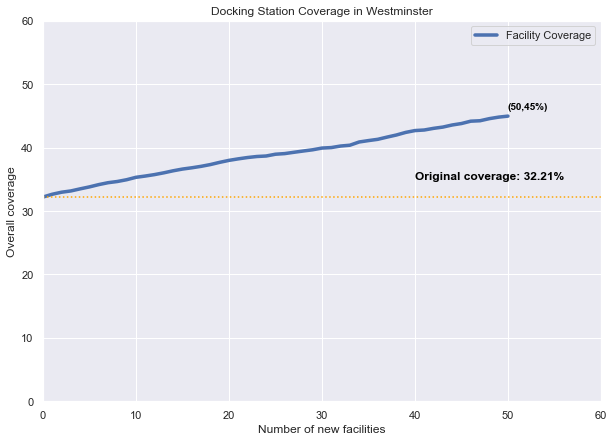

In [58]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.set(style="darkgrid")


sns.lineplot(ax=ax,data=London_new_dock["coverage_overall"],linewidth=3.5,legend=True ).set_title(
    "Docking Station Coverage in Westminster")

ax.set_ylim(0,60)
ax.set_xlim(0,60)
ax.legend(["Facility Coverage"])


plt.axhline(orig_cover, color='orange',linestyle=':')
plt.text(40, 35, "Original coverage: 32.21%", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(50, 46, f"(50,45%)", horizontalalignment='left', size='small', color='black', weight='semibold')

plt.scatter(157, 100, marker='*', color='black', s=100)
ax.set(xlabel='Number of new facilities', ylabel='Overall coverage')